# data1a - Whole or Damaged

In [ ]:
import urllib.request
import pickle
import matplotlib.pyplot as plt
from IPython.display import display,Image,clear_output
import numpy as np
import os
import h5py
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix
from collections import Counter,defaultdict

In [ ]:
!pip install keras
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.models import Sequential, load_model,Model
from keras.layers import Dense, Flatten, Dropout, Activation, add
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.applications.vgg16 import VGG16,preprocess_input
#from keras.utils.np_utils import to_categorical
from keras.utils import get_file
from keras import optimizers
from keras.regularizers import l1, l2
from keras.callbacks import ModelCheckpoint, History

In [ ]:
from keras import backend as K
K.backend()

'tensorflow'

In [ ]:
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = get_file('vgg16_weights.h5', WEIGHTS_PATH_NO_TOP)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Defining input data

In [ ]:
# path to the model weights file
location = '/content/drive/My Drive/TVS/car-damage-dataset/data1a'
top_model_weights_path=location+'/top_model_weights.h5' # will be saved into when we create our model
fine_tuned_model_path = location+'/ft_model.h5'

# dimensions of our images
img_width, img_height = 256, 256

train_data_dir = location+'/training'
val_data_dir = location+'/validation'

train_samples = [len(os.listdir(os.path.join(train_data_dir,i))) for i in os.listdir(train_data_dir)]
nb_train_samples = sum(train_samples)
val_samples = [len(os.listdir(os.path.join(val_data_dir,i))) for i in os.listdir(val_data_dir)]
nb_val_samples = sum(val_samples)

nb_epoch = 50

In [ ]:
train_samples

[920, 920]

In [ ]:
K.image_data_format()

'channels_last'

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)    # img_width first or img_height

In [ ]:
input_shape

(256, 256, 3)

In [ ]:
# def load_vgg16(weights_path='../vgg16_weights.h5'):
#     model = Sequential()
#     model.add(ZeroPadding2D(padding=(1,1),input_shape=(224,224,3)))   # for best performance you should set
#                                                                       # `image_data_format='channels_last'`
#                                                                       # in your Keras config
#                                                                       # at ~/.keras/keras.json.
#     model.add(Convolution2D(filters=64, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=64, kernel_size=3, strides=3, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=128, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=128, kernel_size=3, strides=3, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=256, kernel_size=3, strides=3, activation='relu'))

#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=256, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=256, kernel_size=3, strides=3, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=512, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=512, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=512, kernel_size=3, strides=3, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=512, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=512, kernel_size=3, strides=3, activation='relu'))
#     model.add(ZeroPadding2D(padding=(1,1)))
#     model.add(Convolution2D(filters=512, kernel_size=3, strides=3, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#     # assert os.path.exists(weights_path), 'Model weights not found (see "weights_path")'

#     # Use below code to freeze the conv model i.e. its learning
#     '''
#     for layer in model.layers:
#         layer.trainable = False
#     '''

#     if weights_path:
#     # note: this chops off the last layers of VGG16

#     # loads the weights of the VGG16 networks
#     # NOTE: when there is a complete match between model definition
#     # and your weights savefile, you can simply call model.load_weights(filename)
#         f = h5py.File(weights_path)

#         # LEFT CURRENTLY

In [ ]:
# if(os.path.exists(location+'vgg16.h5')):
#     base_model = load_model('vgg16.h5')
# else:
#     base_model = VGG16(weights='imagenet')
#     base_model.save(location)

KeyboardInterrupt: 

In [ ]:
base_model = VGG16(weights='imagenet',include_top=False,input_shape=input_shape ,pooling=max)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# Set base_model layers to non-trainable
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
def preprocess_input_vgg(x):
    """Wrapper around keras.applications.vgg16.preprocess_input()
    to make it compatible for use with keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument.

    Parameters
    ----------
    x : a numpy 3darray (a single image to be preprocessed)

    Note we cannot pass keras.applications.vgg16.preprocess_input()
    directly to to keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument because the former expects a
    4D tensor whereas the latter expects a 3D tensor. Hence the
    existence of this wrapper.

    Returns a numpy 3darray (the preprocessed image).

    """
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

In [ ]:
def save_bottleneck_features(location):    # SAMAJANA
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

    if(os.path.exists(location+'/bottleneck_features_train.npy')):
        print('Already exists',location+'/bottleneck_features_train.npy')
    else:
        train_generator = datagen.flow_from_directory(train_data_dir,
                                                      target_size=(img_height,img_width),
                                                      batch_size=16,
                                                      class_mode=None,         # only data, no labels
                                                      shuffle=False)           # keep data in same order as labels

        bottleneck_features_train = base_model.predict_generator(train_generator,
                                                                 nb_train_samples // 16,
                                                                 verbose=1)

        print('Saving',location+'/bottleneck_features_train.npy')
        np.save(open(location+'/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)
        #np.save(location+'/bottleneck_features_train.npy',bottleneck_features_train)

    if(os.path.exists(location+'/bottleneck_features_val.npy')):
        print('Already exists',location+'/bottleneck_features_val.npy')
    else:
        # Repeat it with validation data
        val_generator = datagen.flow_from_directory(val_data_dir,
                                                    target_size=(img_height,img_width),
                                                    batch_size=16,
                                                    class_mode=None,
                                                    shuffle=False)

        bottleneck_features_val = base_model.predict_generator(val_generator,
                                                               nb_val_samples / 16,
                                                               verbose=1)
        print('Saving',location+'/bottleneck_features_val.npy')
        np.save(open(location+'/bottleneck_features_val.npy','wb'),bottleneck_features_val)
        #np.save(location+'/bottleneck_features_val.npy',bottleneck_features_train)

In [ ]:
val_labels = np.array([0]*val_samples[0] +
                          [1]*val_samples[1])

In [ ]:
train_data = np.load(open(location+'/bottleneck_features_train.npy', 'rb'))

In [ ]:
train_data.shape

(1840, 8, 8, 512)

In [ ]:
val_data = np.load(open(location+'/bottleneck_features_val.npy', 'rb'))
val_data.shape

(460, 8, 8, 512)

In [ ]:
def train_binary_model(location):
    train_data = np.load(open(location+'/bottleneck_features_train.npy', 'rb'))
    print(train_data.shape[1:])
    train_labels = np.array([0]*train_samples[0]+
                            [1]*train_samples[1])

    val_data = np.load(open(location+'/bottleneck_features_val.npy', 'rb'))
    val_labels = np.array([0]*val_samples[0] +
                          [1]*val_samples[1])

    model = Sequential()
    model.add(Flatten(input_shape=(train_data.shape[1:])))     # 8, 8, 512
    model.add(Dense(units=256, activation='relu',
                    kernel_regularizer=l2(l=0.01)))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),    # check the lr
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint(top_model_weights_path,
                                 monitor='val_acc',
                                 verbose=1,
                                 save_best_only=True,
                                 save_weights_only=True,
                                 mode='auto')     # ?read documentation

    fit = model.fit(train_data, train_labels, epochs=nb_epoch, batch_size=16,
                    validation_data=(val_data, val_labels), callbacks=[checkpoint])

    with open(location+'/top_history.txt', 'w') as f:
        json.dump(fit.history, f)

    return model, fit.history

In [ ]:
# # either bottleneck or this

# top_model = Sequential()
# top_model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# top_model.add(Activation('relu'))
# top_model.add(MaxPooling2D(pool_size=(2, 2)))

# top_model.add(Conv2D(32, (3, 3)))
# top_model.add(Activation('relu'))
# top_model.add(MaxPooling2D(pool_size=(2, 2)))

# top_model.add(Conv2D(64, (3, 3)))
# top_model.add(Activation('relu'))
# top_model.add(MaxPooling2D(pool_size=(2, 2)))

# top_model = Sequential()
# top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
# top_model.add(Dense(units=256,activation='relu',kernel_regularizer=l2(l=0.01)))
# top_model.add(Dropout(rate=0.5))
# top_model.add(Dense(units=1,activation='sigmoid'))

# top_model.compile(optimizer=optimizers.SGD(lr=0.0001,momentum=0.9),    # check the lr
#                   loss='binary_crossentropy',
#                  metrics = ['accuracy'])

# # prepare data augmentation configuration
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')

# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1. / 255)

# train_generator = train_datagen.flow_from_directory(train_data_dir,
#                                                     target_size=(img_height, img_width),
#                                                     batch_size=8,
#                                                     class_mode='binary')   # categorical for multiclass

# test_generator = test_datagen.flow_from_directory(val_data_dir,
#                                                   target_size=(img_height, img_width),
#                                                   batch_size=8,
#                                                   class_mode='binary',     # categorical for multiclass
#                                                   shuffle=False)

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // 8,
#     epochs=nb_epoch,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // 8)

# model.save_weights(top_model_weights_path)

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(units=256,activation='relu',kernel_regularizer=l2(l=0.01)))
top_model.add(Dropout(rate=0.5))
top_model.add(Dense(units=1,activation='sigmoid'))

top_model.load_weights(top_model_weights_path) # load weights_path

#base_model.add(top_model)

model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
print(model.layers[-1].get_weights())
print(top_model.get_weights())
model.summary()

[array([[-0.01012065, -0.01048303,  0.0032335 , ...,  0.00972222,
        -0.01335548, -0.01087625],
       [ 0.00905526, -0.00504446, -0.00211019, ...,  0.00015012,
        -0.00304197,  0.00717667],
       [ 0.01050402, -0.00598194,  0.01128646, ...,  0.00608847,
         0.00694825, -0.00326765],
       ...,
       [ 0.00228057,  0.00289785, -0.00409706, ..., -0.0096005 ,
        -0.01046735,  0.00817893],
       [-0.00052284, -0.00416786, -0.00747126, ..., -0.00335509,
         0.01101705, -0.00097601],
       [-0.00150657,  0.00663762, -0.00871113, ..., -0.00802929,
        -0.00821638, -0.00677615]], dtype=float32), array([-6.63930041e-05, -6.27243571e-05, -4.21339973e-05, -3.36487865e-05,
       -1.31908173e-05,  1.40916454e-04,  3.21922744e-05, -9.27699875e-05,
       -1.64583562e-05, -7.52625201e-05, -6.59315119e-05,  6.05078058e-05,
       -4.62493745e-06,  2.27251494e-05, -1.93112064e-05, -1.38478526e-05,
       -2.43670002e-05,  2.52712562e-05,  1.22849873e-04, -5.67450406e

In [ ]:
def finetune_binary_model(location):
    # build a classifier model to put on top of the convolutional model
    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    top_model.add(Dense(units=256,activation='relu',kernel_regularizer=l2(l=0.01)))
    top_model.add(Dropout(rate=0.5))
    top_model.add(Dense(units=1,activation='sigmoid'))

    top_model.load_weights(top_model_weights_path) # load weights_path

    #base_model.add(top_model)

    model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
    #model.add(top_model)

#     input1 = keras.layers.Input(shape=(16,))
#     x1 = keras.layers.Dense(8, activation='relu')(input1)
#     input2 = keras.layers.Input(shape=(32,))
#     x2 = keras.layers.Dense(8, activation='relu')(input2)
#     added = keras.layers.add([x1, x2])

#     out = keras.layers.Dense(4)(added)
#     model = keras.models.Model(inputs=[input1, input2], outputs=out)

#     # finetune
#     top_model = Sequential()
#     top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
#     top_model.add(Dense(256, activation='relu'))
#     top_model.add(Dropout(0.5))
#     top_model.add(Dense(6, activation='sigmoid'))
#     top_model.load_weights(top_model_weights_path)

#     model = Model(input= base_model.input, output= top_model(model.output))
#     model.add(top_model)


#     # set the first 25 layers (up to the last conv block)
#     # to non-trainable - weights will not be updated
#     for layer in model.layers[:25]:
#         layer.trainable=False

    # compile the model with a SGD/momentum optimizer
    # and a very slow learning rate
    model.compile(optimizer=optimizers.SGD(lr=0.00001,momentum=0.9),    # reduced learning rate by 1/10
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

    # prepare data augmentation configuration
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

    train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=8,
                                                        class_mode='binary')   # categorical for multiclass

    test_generator = test_datagen.flow_from_directory(val_data_dir,
                                                      target_size=(img_height, img_width),
                                                      batch_size=8,
                                                      class_mode='binary',     # categorical for multiclass
                                                      shuffle=False)

    checkpoint = ModelCheckpoint(filepath=fine_tuned_model_path,monitor='val_acc',verbose=1,save_best_only=True,
                                 save_weights_only=False,mode='auto')

    # fine-tune the model
    fit = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples/8,
                              #epochs=nb_epoch,
                              epochs=10,
                              validation_data=test_generator,
                              validation_steps=nb_val_samples/8,
                              verbose=1,
                              callbacks=[checkpoint])

#     model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size,
#     verbose=2)

    with open(location+'/ft_history.txt', 'w') as f:
        json.dump(fit.history, f)

    return model, fit.history

In [ ]:
def evaluate_binary_model(model,directory,labels):
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
    test_generator = test_datagen.flow_from_directory(directory,
                                                     target_size=(img_height,img_width),
                                                     batch_size=8,
                                                     class_mode='binary',     # categorical for multiclass
                                                     shuffle=False)

    predictions = model.predict_generator(test_generator,
                                          steps=len(labels)/8,
                                          verbose=1)

    # use for multiclass
    # pred_labels = np.argmax(predictions, axis=1)

    pred_labels = [0 if i <0.5 else 1 for i in predictions]

    print()
    print(classification_report(labels, pred_labels))
    print()
    cm = confusion_matrix(labels, pred_labels)
#     sns.heatmap(cm, annot=True, fmt='g');
    return cm

In [ ]:
def view_images(img_dir,img_list):
    for img in img_list:
        clear_output()
        display(Image(img_dir+img,width=200))
        num = input("c to continue, q to quit")
        if num == 'c':
            pass
        else:
            return 'Finished for now.'

In [ ]:
def print_best_model_results(model_hist):
    best_epoch = np.argmax(model_hist['val_acc'])
    print('epoch:', best_epoch+1,', val_acc:', model_hist['val_acc'][best_epoch],', val_loss:',
          model_hist['val_loss'][best_epoch])

In [ ]:
def plot_metrics(hist, stop=50):  # stop -> no of data pts in plot
                                # hist(history) -> dict
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # axes = axes.flatten()   # flatten -> numpy flatten

    ax0.plot(range(stop), hist['acc'], label='Training', color='#FF533D')
    ax0.plot(range(stop), hist['val_acc'], label='Validation', color='#03507E')
    ax0.set_title('Accuracy')
    ax0.set_ylabel('Accuracy')
    ax0.set_xlabel('Epoch')
    ax0.legend(loc='lower right')

    ax1.plot(range(stop), hist['loss'], label='Training', color='#FF533D')
    ax1.plot(range(stop), hist['val_loss'],
             label='Validation', color='#03507E')
    ax1.set_title('Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper right')

    plt.tight_layout()

    print("Best Model: ")
    print_best_model_results(hist)

### Testing Image Generation

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

img = load_img(path='/content/drive/My Drive/TVS/car-damage-dataset/data1a/training/00-damage/0354.JPEG')  # this is a PIL image
x = img_to_array(img)   # x shape (height,width,3)
x = x.reshape((1,)+x.shape)  # this is a numpy array of shape (1,height,width,3)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the 'preview/' directory
if not os.path.exists('/content/drive/My Drive/TVS/car-damage-dataset/data1a_preview'):
    os.makedirs('/content/drive/My Drive/TVS/car-damage-dataset/data1a_preview')
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='/content/drive/My Drive/TVS/car-damage-dataset/data1a_preview', save_prefix='damage_car',
                         save_format='jpeg'):
    i +=1
    if i > 30:
        break # otherwise the generator would loop indefinitely

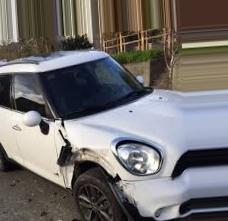

c to continue, q to quitq


'Finished for now.'

In [ ]:
view_images('/content/drive/My Drive/TVS/car-damage-dataset/data1a_preview/',os.listdir('/content/drive/My Drive/TVS/car-damage-dataset/data1a_preview'))

### Training

In [ ]:
# do not rerun!!
save_bottleneck_features(location)

Already exists /content/drive/My Drive/TVS/car-damage-dataset/data1a/bottleneck_features_train.npy
Already exists /content/drive/My Drive/TVS/car-damage-dataset/data1a/bottleneck_features_val.npy


In [ ]:
sns.set_style('whitegrid')

In [ ]:
d1a_model1,d1a_history1 = train_binary_model(location)

(8, 8, 512)
Epoch 1/50
115/115 [==============================] - ETA: 0s - loss: 589.0023 - accuracy: 0.4815

115/115 [==============================] - 2s 8ms/step - loss: 589.0023 - accuracy: 0.4815 - val_loss: 848.1689 - val_accuracy: 0.4957
Epoch 2/50
108/115 [===========================>..] - ETA: 0s - loss: 4485.4521 - accuracy: 0.4855

115/115 [==============================] - 1s 6ms/step - loss: 4632.5933 - accuracy: 0.4875 - val_loss: 6718.1665 - val_accuracy: 0.4978
Epoch 3/50
108/115 [===========================>..] - ETA: 0s - loss: 10842.9326 - accuracy: 0.4983

115/115 [==============================] - 1s 6ms/step - loss: 10863.6064 - accuracy: 0.4984 - val_loss: 11002.4336 - val_accuracy: 0.5000
Epoch 4/50
105/115 [==========================>...] - ETA: 0s - loss: 9058.5371 - accuracy: 0.4792

115/115 [==============================] - 1s 5ms/step - loss: 8897.9639 - accuracy: 0.4793 - val_loss: 7051.9897 - val_accuracy: 0.5000
Epoch 5/50
106/115 [==========================>...] - ETA: 0s - loss: 5739.0352 - accuracy: 0.4971

115/115 [==============================] - 1s 6ms/step - loss: 5643.8296 - accuracy: 0.5033 - val_loss: 4438.3203 - val_accuracy: 0.5000
Epoch 6/50
104/115 [==========================>...] - ETA: 0s - loss: 3633.6111 - accuracy: 0.4868

115/115 [==============================] - 1s 5ms/step - loss: 3559.0288 - accuracy: 0.4853 - val_loss: 2784.6729 - val_accuracy: 0.5000
Epoch 7/50
106/115 [==========================>...] - ETA: 0s - loss: 2265.5452 - accuracy: 0.4864

115/115 [==============================] - 1s 5ms/step - loss: 2227.4097 - accuracy: 0.4853 - val_loss: 1742.2742 - val_accuracy: 0.5000
Epoch 8/50
108/115 [===========================>..] - ETA: 0s - loss: 1412.1710 - accuracy: 0.4884

115/115 [==============================] - 1s 5ms/step - loss: 1393.6644 - accuracy: 0.4870 - val_loss: 1090.1779 - val_accuracy: 0.5000
Epoch 9/50
112/115 [============================>.] - ETA: 0s - loss: 877.0336 - accuracy: 0.4972

115/115 [==============================] - 1s 6ms/step - loss: 872.0979 - accuracy: 0.4957 - val_loss: 682.2448 - val_accuracy: 0.5000
Epoch 10/50
108/115 [===========================>..] - ETA: 0s - loss: 553.0613 - accuracy: 0.4994

115/115 [==============================] - 1s 5ms/step - loss: 545.8192 - accuracy: 0.4935 - val_loss: 427.0529 - val_accuracy: 0.5000
Epoch 11/50
103/115 [=========================>....] - ETA: 0s - loss: 349.5276 - accuracy: 0.4763

115/115 [==============================] - 1s 6ms/step - loss: 341.7097 - accuracy: 0.4783 - val_loss: 267.4120 - val_accuracy: 0.5000
Epoch 12/50
105/115 [==========================>...] - ETA: 0s - loss: 218.0877 - accuracy: 0.4851

115/115 [==============================] - 1s 5ms/step - loss: 214.0229 - accuracy: 0.4821 - val_loss: 167.5453 - val_accuracy: 0.5000
Epoch 13/50
108/115 [===========================>..] - ETA: 0s - loss: 136.0053 - accuracy: 0.4850

115/115 [==============================] - 1s 7ms/step - loss: 134.2462 - accuracy: 0.4848 - val_loss: 105.3913 - val_accuracy: 0.5000
Epoch 14/50
111/115 [===========================>..] - ETA: 0s - loss: 85.0832 - accuracy: 0.4865

115/115 [==============================] - 1s 9ms/step - loss: 84.4499 - accuracy: 0.4870 - val_loss: 66.2030 - val_accuracy: 0.5000
Epoch 15/50
113/115 [============================>.] - ETA: 0s - loss: 53.2873 - accuracy: 0.4867

115/115 [==============================] - 1s 12ms/step - loss: 53.0897 - accuracy: 0.4870 - val_loss: 41.6743 - val_accuracy: 0.5000
Epoch 16/50
111/115 [===========================>..] - ETA: 0s - loss: 33.7191 - accuracy: 0.4944

115/115 [==============================] - 2s 14ms/step - loss: 33.4714 - accuracy: 0.4929 - val_loss: 26.3301 - val_accuracy: 0.5000
Epoch 17/50
109/115 [===========================>..] - ETA: 0s - loss: 21.4319 - accuracy: 0.4857

115/115 [==============================] - 1s 13ms/step - loss: 21.1988 - accuracy: 0.4848 - val_loss: 16.7308 - val_accuracy: 0.5000
Epoch 18/50
108/115 [===========================>..] - ETA: 0s - loss: 13.6914 - accuracy: 0.4664

115/115 [==============================] - 1s 9ms/step - loss: 13.5209 - accuracy: 0.4701 - val_loss: 10.7259 - val_accuracy: 0.5000
Epoch 19/50
106/115 [==========================>...] - ETA: 0s - loss: 8.8549 - accuracy: 0.5029

115/115 [==============================] - 1s 5ms/step - loss: 8.7172 - accuracy: 0.5022 - val_loss: 6.9694 - val_accuracy: 0.5000
Epoch 20/50
105/115 [==========================>...] - ETA: 0s - loss: 5.8087 - accuracy: 0.5137

115/115 [==============================] - 1s 6ms/step - loss: 5.7129 - accuracy: 0.5158 - val_loss: 4.6205 - val_accuracy: 0.5000
Epoch 21/50
107/115 [==========================>...] - ETA: 0s - loss: 3.8819 - accuracy: 0.4953

115/115 [==============================] - 1s 5ms/step - loss: 3.8341 - accuracy: 0.4940 - val_loss: 3.1493 - val_accuracy: 0.5000
Epoch 22/50
112/115 [============================>.] - ETA: 0s - loss: 2.6686 - accuracy: 0.4939

115/115 [==============================] - 1s 6ms/step - loss: 2.6575 - accuracy: 0.4957 - val_loss: 2.2296 - val_accuracy: 0.5000
Epoch 23/50
113/115 [============================>.] - ETA: 0s - loss: 1.9266 - accuracy: 0.4862

115/115 [==============================] - 1s 6ms/step - loss: 1.9220 - accuracy: 0.4870 - val_loss: 1.6544 - val_accuracy: 0.5000
Epoch 24/50
107/115 [==========================>...] - ETA: 0s - loss: 1.4735 - accuracy: 0.5093

115/115 [==============================] - 1s 6ms/step - loss: 1.4618 - accuracy: 0.5103 - val_loss: 1.2956 - val_accuracy: 0.5000
Epoch 25/50
112/115 [============================>.] - ETA: 0s - loss: 1.1771 - accuracy: 0.4950

115/115 [==============================] - 1s 6ms/step - loss: 1.1743 - accuracy: 0.4962 - val_loss: 1.0694 - val_accuracy: 0.5000
Epoch 26/50
114/115 [============================>.] - ETA: 0s - loss: 0.9944 - accuracy: 0.4814

115/115 [==============================] - 1s 6ms/step - loss: 0.9938 - accuracy: 0.4826 - val_loss: 0.9285 - val_accuracy: 0.5000
Epoch 27/50
103/115 [=========================>....] - ETA: 0s - loss: 0.8861 - accuracy: 0.4933

115/115 [==============================] - 1s 5ms/step - loss: 0.8818 - accuracy: 0.4967 - val_loss: 0.8407 - val_accuracy: 0.5000
Epoch 28/50
104/115 [==========================>...] - ETA: 0s - loss: 0.8133 - accuracy: 0.5018

115/115 [==============================] - 1s 6ms/step - loss: 0.8108 - accuracy: 0.5022 - val_loss: 0.7853 - val_accuracy: 0.5000
Epoch 29/50
112/115 [============================>.] - ETA: 0s - loss: 0.7671 - accuracy: 0.5000

115/115 [==============================] - 1s 6ms/step - loss: 0.7667 - accuracy: 0.4989 - val_loss: 0.7508 - val_accuracy: 0.5000
Epoch 30/50
104/115 [==========================>...] - ETA: 0s - loss: 0.7400 - accuracy: 0.5048

115/115 [==============================] - 1s 6ms/step - loss: 0.7392 - accuracy: 0.5033 - val_loss: 0.7294 - val_accuracy: 0.5000
Epoch 31/50
115/115 [==============================] - ETA: 0s - loss: 0.7219 - accuracy: 0.4864

115/115 [==============================] - 1s 6ms/step - loss: 0.7219 - accuracy: 0.4864 - val_loss: 0.7160 - val_accuracy: 0.5000
Epoch 32/50
110/115 [===========================>..] - ETA: 0s - loss: 6.8490 - accuracy: 0.5040

115/115 [==============================] - 1s 6ms/step - loss: 7.3030 - accuracy: 0.5016 - val_loss: 17.1253 - val_accuracy: 0.5000
Epoch 33/50
113/115 [============================>.] - ETA: 0s - loss: 13.9589 - accuracy: 0.5011

115/115 [==============================] - 1s 10ms/step - loss: 13.9092 - accuracy: 0.5016 - val_loss: 11.0371 - val_accuracy: 0.5000
Epoch 34/50
115/115 [==============================] - ETA: 0s - loss: 8.9667 - accuracy: 0.5000

115/115 [==============================] - 1s 12ms/step - loss: 8.9667 - accuracy: 0.5000 - val_loss: 7.1639 - val_accuracy: 0.5000
Epoch 35/50
113/115 [============================>.] - ETA: 0s - loss: 5.8883 - accuracy: 0.5022

115/115 [==============================] - 1s 10ms/step - loss: 5.8688 - accuracy: 0.5005 - val_loss: 4.7410 - val_accuracy: 0.5000
Epoch 36/50
110/115 [===========================>..] - ETA: 0s - loss: 3.9619 - accuracy: 0.5017

115/115 [==============================] - 1s 9ms/step - loss: 3.9312 - accuracy: 0.5011 - val_loss: 3.2254 - val_accuracy: 0.5000
Epoch 37/50
112/115 [============================>.] - ETA: 0s - loss: 2.7300 - accuracy: 0.5073

115/115 [==============================] - 1s 8ms/step - loss: 2.7186 - accuracy: 0.5060 - val_loss: 2.2774 - val_accuracy: 0.5000
Epoch 38/50
111/115 [===========================>..] - ETA: 0s - loss: 1.9701 - accuracy: 0.5023

115/115 [==============================] - 1s 8ms/step - loss: 1.9606 - accuracy: 0.5011 - val_loss: 1.6844 - val_accuracy: 0.5000
Epoch 39/50
111/115 [===========================>..] - ETA: 0s - loss: 1.4923 - accuracy: 0.4977

115/115 [==============================] - 1s 7ms/step - loss: 1.4863 - accuracy: 0.4967 - val_loss: 1.3132 - val_accuracy: 0.5000
Epoch 40/50
114/115 [============================>.] - ETA: 0s - loss: 1.1902 - accuracy: 0.4890

115/115 [==============================] - 1s 8ms/step - loss: 1.1893 - accuracy: 0.4891 - val_loss: 1.0810 - val_accuracy: 0.5000
Epoch 41/50
115/115 [==============================] - ETA: 0s - loss: 1.0038 - accuracy: 0.4924

115/115 [==============================] - 1s 6ms/step - loss: 1.0038 - accuracy: 0.4924 - val_loss: 0.9358 - val_accuracy: 0.5000
Epoch 42/50
107/115 [==========================>...] - ETA: 0s - loss: 0.8904 - accuracy: 0.4930

115/115 [==============================] - 1s 6ms/step - loss: 0.8874 - accuracy: 0.4946 - val_loss: 0.8449 - val_accuracy: 0.5000
Epoch 43/50
110/115 [===========================>..] - ETA: 0s - loss: 0.8160 - accuracy: 0.4909

115/115 [==============================] - 1s 6ms/step - loss: 0.8150 - accuracy: 0.4891 - val_loss: 0.7882 - val_accuracy: 0.5000
Epoch 44/50
114/115 [============================>.] - ETA: 0s - loss: 2249.0491 - accuracy: 0.4896

115/115 [==============================] - 1s 8ms/step - loss: 2286.1335 - accuracy: 0.4891 - val_loss: 6494.4150 - val_accuracy: 0.5000
Epoch 45/50
111/115 [===========================>..] - ETA: 0s - loss: 5282.2017 - accuracy: 0.4882

115/115 [==============================] - 1s 7ms/step - loss: 5242.7280 - accuracy: 0.4902 - val_loss: 4105.2456 - val_accuracy: 0.5000
Epoch 46/50
109/115 [===========================>..] - ETA: 0s - loss: 3320.9822 - accuracy: 0.4805

115/115 [==============================] - 1s 7ms/step - loss: 3283.6458 - accuracy: 0.4761 - val_loss: 2568.3870 - val_accuracy: 0.5000
Epoch 47/50
113/115 [============================>.] - ETA: 0s - loss: 2062.1619 - accuracy: 0.5000

115/115 [==============================] - 1s 8ms/step - loss: 2054.4170 - accuracy: 0.5000 - val_loss: 1606.9712 - val_accuracy: 0.5000
Epoch 48/50
115/115 [==============================] - ETA: 0s - loss: 1285.4463 - accuracy: 0.4837

115/115 [==============================] - 1s 8ms/step - loss: 1285.4463 - accuracy: 0.4837 - val_loss: 1005.5361 - val_accuracy: 0.5000
Epoch 49/50
109/115 [===========================>..] - ETA: 0s - loss: 813.5403 - accuracy: 0.4891

115/115 [==============================] - 1s 7ms/step - loss: 804.3998 - accuracy: 0.4913 - val_loss: 629.2952 - val_accuracy: 0.5000
Epoch 50/50
109/115 [===========================>..] - ETA: 0s - loss: 509.1876 - accuracy: 0.5040

115/115 [==============================] - 1s 7ms/step - loss: 503.4699 - accuracy: 0.5000 - val_loss: 393.9294 - val_accuracy: 0.5000


In [ ]:
d1a_history1

{'loss': [589.0023193359375,
  4632.59326171875,
  10863.6064453125,
  8897.9638671875,
  5643.82958984375,
  3559.02880859375,
  2227.40966796875,
  1393.6644287109375,
  872.097900390625,
  545.8191528320312,
  341.709716796875,
  214.0229034423828,
  134.24618530273438,
  84.44987487792969,
  53.08973693847656,
  33.47135543823242,
  21.198776245117188,
  13.520923614501953,
  8.717171669006348,
  5.712850093841553,
  3.834148645401001,
  2.657460927963257,
  1.921967625617981,
  1.4618192911148071,
  1.1743465662002563,
  0.9937804341316223,
  0.8817506432533264,
  0.8108331561088562,
  0.7667469382286072,
  0.73918616771698,
  0.7219486236572266,
  7.303028583526611,
  13.909157752990723,
  8.966729164123535,
  5.868778705596924,
  3.931246042251587,
  2.718592643737793,
  1.9605603218078613,
  1.486342430114746,
  1.189305305480957,
  1.0038151741027832,
  0.8874191045761108,
  0.8149749040603638,
  2286.133544921875,
  5242.72802734375,
  3283.645751953125,
  2054.4169921875,
  

In [ ]:
hist1={}

hist1['loss']=d1a_history1['loss']
hist1['acc']=d1a_history1['accuracy']
hist1['val_loss']=d1a_history1['val_loss']
hist1['val_acc']=d1a_history1['val_accuracy']
print(hist1)


{'loss': [589.0023193359375, 4632.59326171875, 10863.6064453125, 8897.9638671875, 5643.82958984375, 3559.02880859375, 2227.40966796875, 1393.6644287109375, 872.097900390625, 545.8191528320312, 341.709716796875, 214.0229034423828, 134.24618530273438, 84.44987487792969, 53.08973693847656, 33.47135543823242, 21.198776245117188, 13.520923614501953, 8.717171669006348, 5.712850093841553, 3.834148645401001, 2.657460927963257, 1.921967625617981, 1.4618192911148071, 1.1743465662002563, 0.9937804341316223, 0.8817506432533264, 0.8108331561088562, 0.7667469382286072, 0.73918616771698, 0.7219486236572266, 7.303028583526611, 13.909157752990723, 8.966729164123535, 5.868778705596924, 3.931246042251587, 2.718592643737793, 1.9605603218078613, 1.486342430114746, 1.189305305480957, 1.0038151741027832, 0.8874191045761108, 0.8149749040603638, 2286.133544921875, 5242.72802734375, 3283.645751953125, 2054.4169921875, 1285.4462890625, 804.3998413085938, 503.4698791503906], 'acc': [0.48152172565460205, 0.4875000

Best Model: 
epoch: 3 , val_acc: 0.5 , val_loss: 11002.43359375


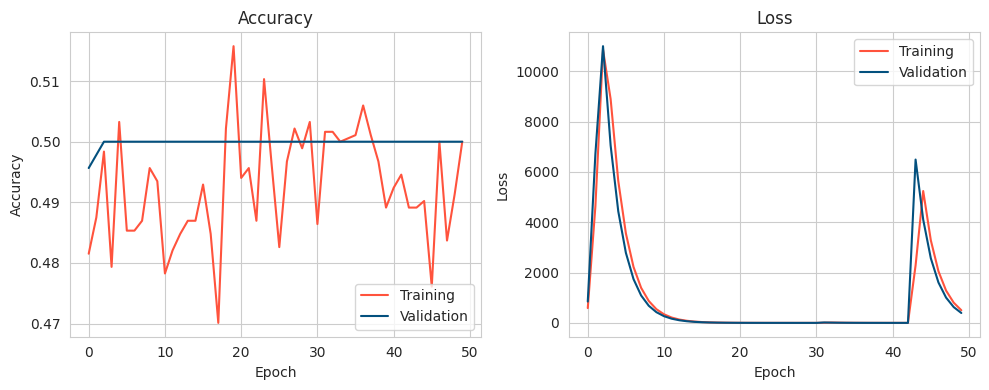

In [ ]:
# Winner

plot_metrics(hist1)  # sgd with lr = 0.0001, sigmoid, with l2 = 0.001

### Fine Tuning

In [ ]:
ft_model,ft_history = finetune_binary_model(location)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


<ipython-input-28-b0c0be00a2f7>:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit = model.fit_generator(train_generator,


Epoch 1/10
230/230 [==============================] - ETA: 0s - loss: 33415.8281 - accuracy: 0.4989

230/230 [==============================] - 447s 2s/step - loss: 33415.8281 - accuracy: 0.4989 - val_loss: 29981.6523 - val_accuracy: 0.4978
Epoch 2/10
230/230 [==============================] - ETA: 0s - loss: 19487.9297 - accuracy: 0.4799

230/230 [==============================] - 53s 229ms/step - loss: 19487.9297 - accuracy: 0.4799 - val_loss: 11745.5986 - val_accuracy: 0.4913
Epoch 3/10
230/230 [==============================] - ETA: 0s - loss: 20125.0430 - accuracy: 0.5082

230/230 [==============================] - 47s 203ms/step - loss: 20125.0430 - accuracy: 0.5082 - val_loss: 26086.0195 - val_accuracy: 0.4913
Epoch 4/10
230/230 [==============================] - ETA: 0s - loss: 17543.3047 - accuracy: 0.4913

230/230 [==============================] - 50s 218ms/step - loss: 17543.3047 - accuracy: 0.4913 - val_loss: 11127.8525 - val_accuracy: 0.5000
Epoch 5/10
230/230 [==============================] - ETA: 0s - loss: 7275.2368 - accuracy: 0.4946

230/230 [==============================] - 49s 212ms/step - loss: 7275.2368 - accuracy: 0.4946 - val_loss: 4650.9502 - val_accuracy: 0.5000
Epoch 6/10
230/230 [==============================] - ETA: 0s - loss: 3031.5527 - accuracy: 0.4935

230/230 [==============================] - 49s 212ms/step - loss: 3031.5527 - accuracy: 0.4935 - val_loss: 1825.5374 - val_accuracy: 0.5000
Epoch 7/10
230/230 [==============================] - ETA: 0s - loss: 1187.0114 - accuracy: 0.4870

230/230 [==============================] - 47s 202ms/step - loss: 1187.0114 - accuracy: 0.4870 - val_loss: 714.8300 - val_accuracy: 0.5000
Epoch 8/10
230/230 [==============================] - ETA: 0s - loss: 464.9492 - accuracy: 0.4935

230/230 [==============================] - 47s 204ms/step - loss: 464.9492 - accuracy: 0.4935 - val_loss: 280.1637 - val_accuracy: 0.5000
Epoch 9/10
230/230 [==============================] - ETA: 0s - loss: 182.3764 - accuracy: 0.4880

230/230 [==============================] - 49s 213ms/step - loss: 182.3764 - accuracy: 0.4880 - val_loss: 110.0615 - val_accuracy: 0.5000
Epoch 10/10
230/230 [==============================] - ETA: 0s - loss: 197.1186 - accuracy: 0.4962

230/230 [==============================] - 48s 207ms/step - loss: 197.1186 - accuracy: 0.4962 - val_loss: 315.4331 - val_accuracy: 0.5000


KeyError: ignored

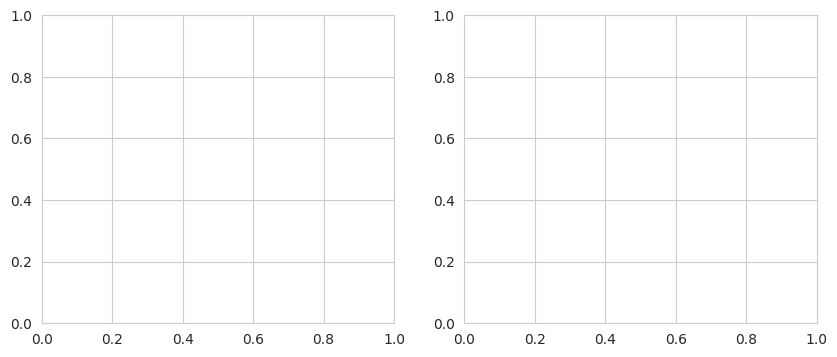

In [ ]:
# Winner
plot_metrics(ft_history,stop=10)   # sgd with lr = 0.0001, sigmoid, with l2 = 0.001

### Load Modal Point

In [ ]:
ft_model = load_model(location+'/ft_model.h5')

In [ ]:
with open(location+'/top_history.txt') as f:
    top_history = json.load(f)

KeyError: ignored

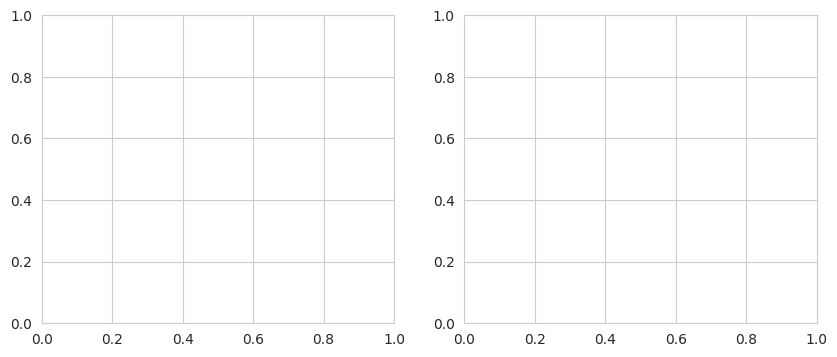

In [ ]:
plot_metrics(top_history)

In [ ]:
with open(location+'/ft_history.txt') as f:
    ft_history = json.load(f)

KeyError: ignored

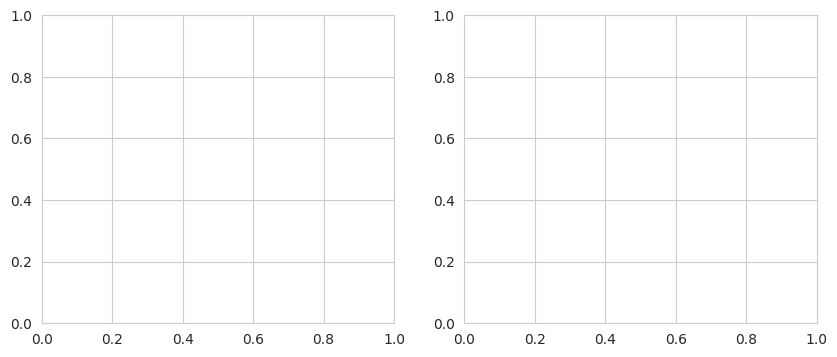

In [ ]:
plot_metrics(ft_history,stop=10)

In [ ]:
def plot_acc_metrics(hist1,hist2,stop1=50,stop2=10):
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(5,6))
    axes = axes.flatten()

    axes[0].plot(range(stop1),hist1['acc'],label='training',color='#FF533D')
    axes[0].plot(range(stop1),hist1['val_acc'],label='validation',color='#03507E')
    axes[0].set_title('Training')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend(loc='lower right')

    axes[1].plot(range(stop2),hist2['acc'],label='training',color='#FF533D')
    axes[1].plot(range(stop2),hist2['val_acc'],label='validation',color='#03507E')
    axes[1].set_title('Fine-Tuning')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuarcy')
    axes[1].legend(loc='lower right')

    plt.tight_layout()

KeyError: ignored

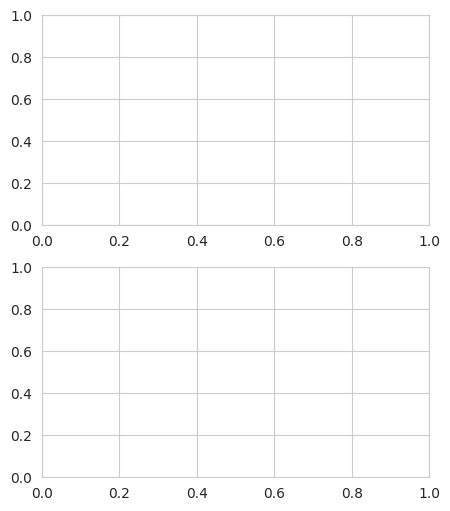

In [ ]:
plot_acc_metrics(top_history,ft_history)

In [ ]:
cm = evaluate_binary_model(ft_model,val_data_dir,val_labels)

Found 460 images belonging to 2 classes.


<ipython-input-29-dec2a480aa77>:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator,


57/57 [==============================] - 4s 62ms/step

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       230
           1       0.90      0.95      0.92       230

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460




In [ ]:
heatmap_labels = ['damaged','whole']

<Axes: >

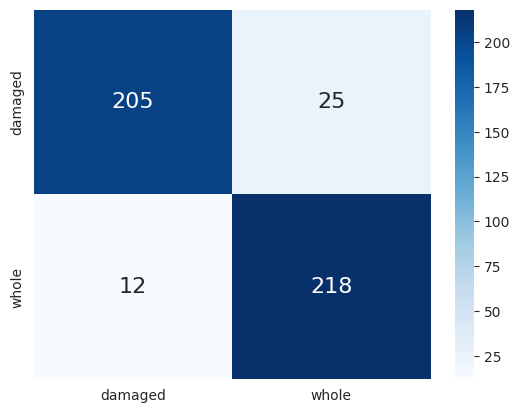

In [ ]:
sns.heatmap(cm,annot=True,annot_kws={"size":16},
           fmt='g', cmap='Blues', xticklabels=heatmap_labels, yticklabels=heatmap_labels)

### Making live predictions

In [ ]:
def car_categories_gate(img_url,model):
    urllib.request.urlretrieve(img_url,'save_second_gate.jpg')
    img = load_img('save_second_gate.jpg',target_size=(256,256))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    pred = model.predict(x)
    print("Validating that damage exists...")
    #print(pred)
    if pred[0][0] <=.5:
        print("Validation complete - proceed to location and severity determination")
    else:
        print("Are you sure that your car is damaged? Please submit another picture of the damage.")
        print("Hint: Try zooming in/out, using a different angle or different lighting")

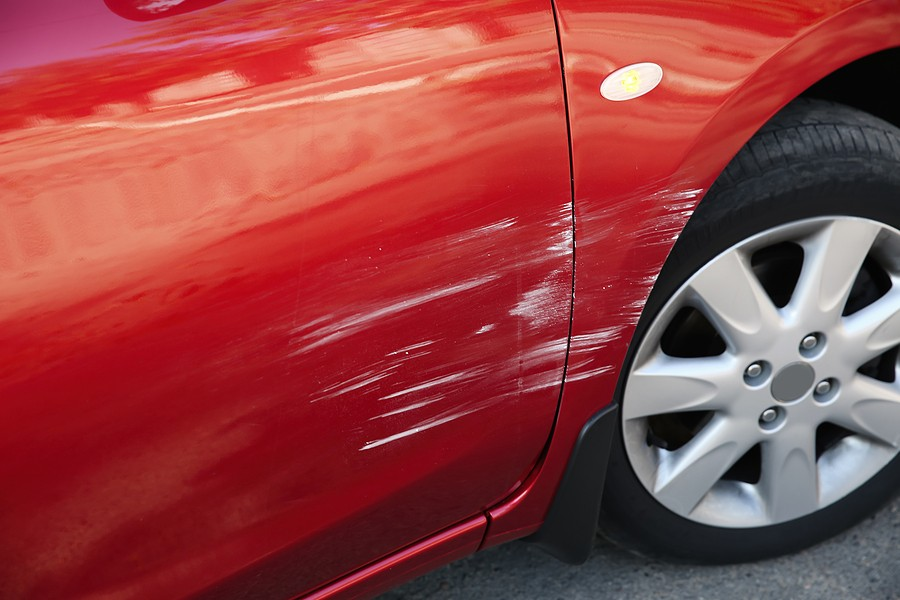

In [ ]:
Image('https://www.cashcarsbuyer.com/wp-content/uploads/2021/01/How-to-Remove-Scratches-from-A-Car.jpg')

In [ ]:
car_categories_gate('https://www.cashcarsbuyer.com/wp-content/uploads/2021/01/How-to-Remove-Scratches-from-A-Car.jpg', ft_model)

1/1 [==============================] - 0s 104ms/step
Validating that damage exists...
Validation complete - proceed to location and severity determination


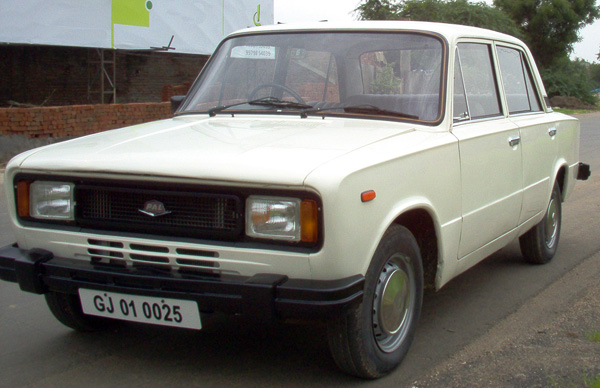

In [ ]:
Image('https://dsource.in/sites/default/files/resource/timeline-indian-automobile/four-wheelers/premier-118ne-1985/images/01_Premier.jpg')

In [ ]:
car_categories_gate('https://dsource.in/sites/default/files/resource/timeline-indian-automobile/four-wheelers/premier-118ne-1985/images/01_Premier.jpg', ft_model)

1/1 [==============================] - 0s 20ms/step
Validating that damage exists...
Are you sure that your car is damaged? Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


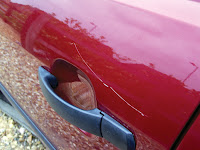

In [ ]:
Image('http://1.bp.blogspot.com/-ToQS-qIxYbo/UDNuV5OcVQI/AAAAAAAABdo/tjeQywWiOo0/s200/Key+scratch.jpg')

In [ ]:
car_categories_gate('http://1.bp.blogspot.com/-ToQS-qIxYbo/UDNuV5OcVQI/AAAAAAAABdo/tjeQywWiOo0/s200/Key+scratch.jpg', ft_model)

1/1 [==============================] - 0s 22ms/step
Validating that damage exists...
Validation complete - proceed to location and severity determination


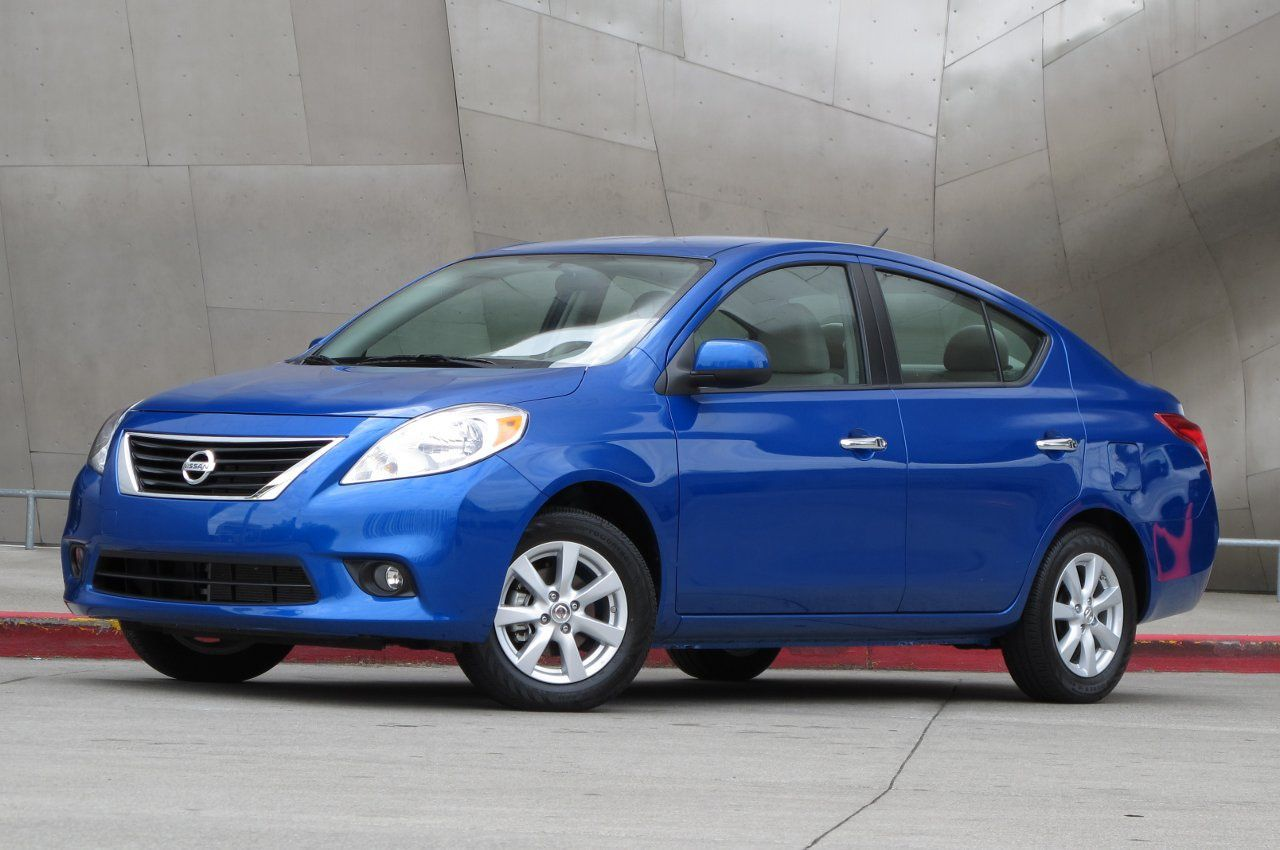

In [ ]:
Image('https://i.pinimg.com/originals/00/e2/d2/00e2d282c9d51424c5c3a96e9e649e37.jpg')

In [ ]:
car_categories_gate('https://i.pinimg.com/originals/00/e2/d2/00e2d282c9d51424c5c3a96e9e649e37.jpg',ft_model)

1/1 [==============================] - 0s 20ms/step
Validating that damage exists...
Are you sure that your car is damaged? Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


### Looking at edge cases

In [ ]:
def get_edge_cases(model, directory, exp_result):
    img_list = os.listdir(directory)
    edge_list = []
    for name in img_list:
        img = load_img(directory+name, target_size=(256, 256)) # this is a PIL image
        x = img_to_array(img) # this is a Numpy array with shape (256, 256, 3)
        x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 256, 256, 3)
        pred_prob = model.predict(x)
        if pred_prob[0][0] <=0.5:
            pred = 0
        else:
            pred = 1
#         print(pred_prob,pred,exp_result)
        if pred != exp_result:
            edge_list.append(name)
    return edge_list

In [ ]:
evaluate_binary_model(ft_model, val_data_dir, val_labels)
# TP = 224, TN = 192, FP = 38, FN = 6
# 9 were predicted to be damaged but were actually whole
# 36 were predicted to be whole but were actually damaged

Found 460 images belonging to 2 classes.
 1/57 [..............................] - ETA: 4s

<ipython-input-29-dec2a480aa77>:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator,


57/57 [==============================] - 4s 62ms/step

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       230
           1       0.90      0.95      0.92       230

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460




array([[205,  25],
       [ 12, 218]])

In [ ]:
fp = get_edge_cases(ft_model, location+'/validation/00-damage/', 0)

1/1 [==============================] - 0s 32ms/step


In [ ]:
len(fp)

17

In [ ]:
view_images('./car-damage-dataset/data1a/validation/00-damage/', fp)  # damaged, identifed as whole

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [ ]:
fn = get_edge_cases(ft_model,location+'/validation/01-whole/', 1)

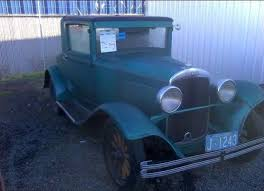

KeyboardInterrupt: 

In [ ]:
view_images('./car-damage-dataset/data1a/validation/01-whole/', fn)  # whole, identifed as damage

In [ ]:
len(fn)

16